# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

# **Import CSV as DataFrame**

In [ ]:
df = pd.read_csv(r"https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [18]:
#checking missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling missing values

# Mean--> Average Value

# Mode--> Most repeated value

In [19]:
#mean value of item_weight column
df["Item_Weight"].mean()

12.788355480321624

In [21]:
#filling the missing values in "Item_weight" column with "Mean Value"
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

Get the columns

In [23]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Get the Summary Statistics

In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.244696,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.788355,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


# Numerical Feature

In [25]:
sns.set()

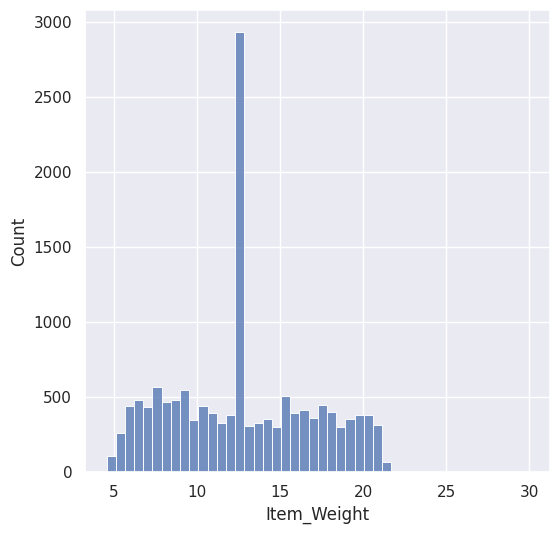

In [28]:
#Item_weight distribution
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Weight'])
plt.show()

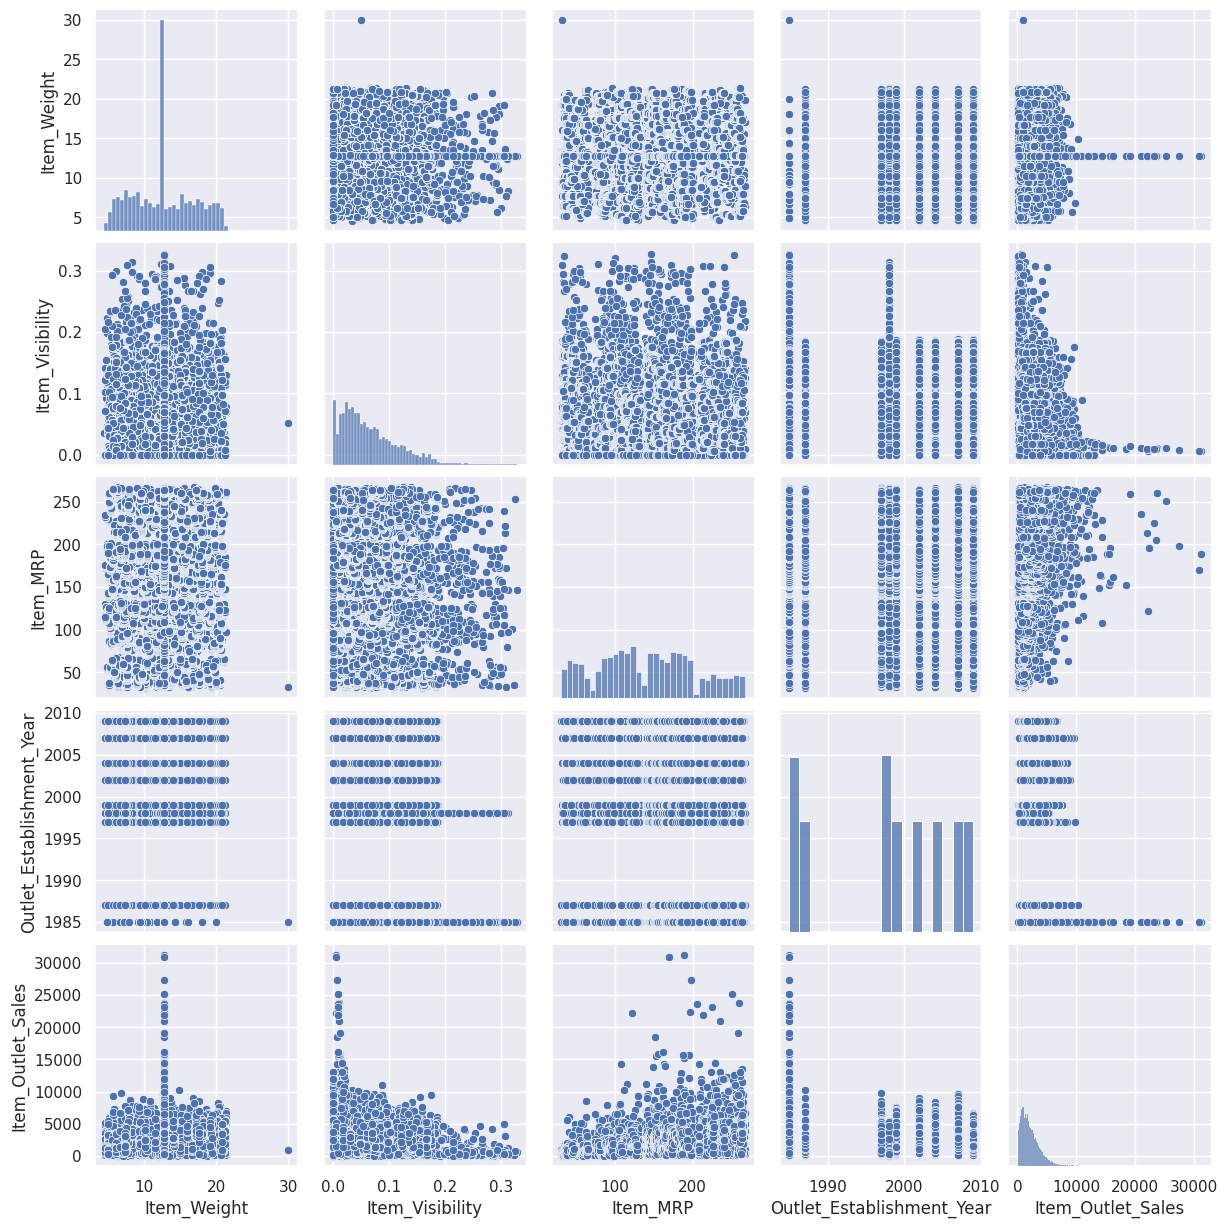

In [29]:
sns.pairplot(df)

# **Data Pre-processing**

Get Categories and Count of Categories variables

In [30]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [31]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [40]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg' :'Regular'}}, inplace=True)

In [42]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8663
Regular             5019
Low FAt              522
dtype: int64

In [44]:
df.replace({'Item_Fat_Content':{'Low FAt':'Low Fat'}}, inplace=True)

In [45]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
dtype: int64

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,Low Fat,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


# **Label Encoding**

In [46]:
encoder = LabelEncoder()

In [48]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,946,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,946,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,946,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,946,12.3,0,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,740,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


# **Splitting Features and Target**

In [51]:
df.shape

(14204, 12)

In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
x = df.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

In [55]:
print(x)

       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                  946    12.300000                 0         0.111448   
1                  946    12.300000                 0         0.111904   
2                  946    12.300000                 0         0.111728   
3                  946    12.300000                 0         0.000000   
4                  740     9.800000                 1         0.045523   
...                ...          ...               ...              ...   
14199              422    12.800000                 0         0.069606   
14200              422    12.800000                 0         0.070013   
14201              422    12.800000                 0         0.069561   
14202              422    12.788355                 0         0.069282   
14203              422    12.800000                 0         0.069727   

       Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0              0   33.4874         

In [56]:
print(y)

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64


# **Train And Testing Data**

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [58]:
print(x.shape,x_train.shape,x_test.shape)

(14204, 11) (11363, 11) (2841, 11)


# Machine Learing Model **Training**

In [59]:
#XGBoost Regressor
regressor  =  XGBRFRegressor()

In [60]:
regressor.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

# **Evalution**

In [64]:
#prediction on training data
training_data_pred = regressor.predict(x_train)

In [65]:
# R square value
r2_train = metrics.r2_score(y_train,training_data_pred)

In [63]:
print('R Square value: ',r2_train)

R Square value:  0.6005155265471933


In [71]:
#prediction on testing data
testing_data_pred = regressor.predict(x_test)

In [72]:
# R square value
r2_test = metrics.r2_score(y_test,testing_data_pred)

In [73]:
print('R Square value: ',r2_test)

R Square value:  0.5318398214251583


# Visualization of Actual Price vs Predicted Price

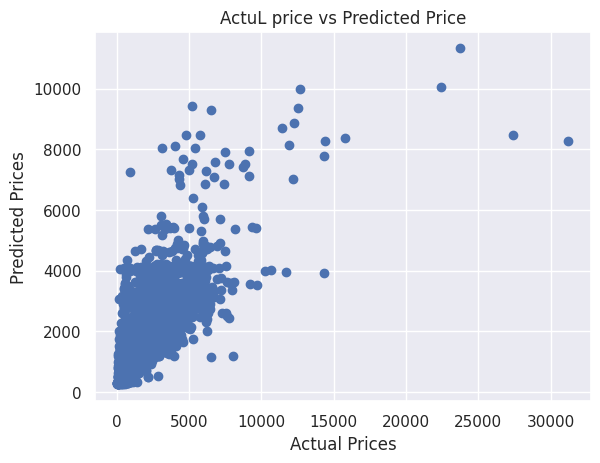

In [75]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("ActuL price vs Predicted Price")
plt.show()